In [74]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('data/Car_Purchasing_Data.csv')
#컨트롤 스페이스 누르면 자동완성됨

In [ ]:
#연봉, 신용카드 한도, 자동차 구매비용, 자동차 구매비용, 나이, 구매날짜, 구매시간, 구매지역을 가지고 구매금액 예측하기

In [4]:
df.head(3)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921


In [5]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 55112 (\N{HANGUL SYLLABLE HYUSS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


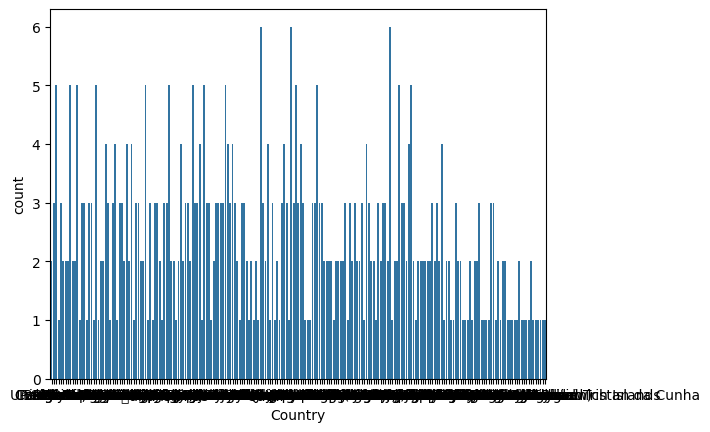

In [26]:
df['Country'].nunique()

df['Country'].value_counts()
sb.countplot(data=df, x='Country')
plt.show()

In [13]:
df.loc[ df['Annual Salary']== df['Annual Salary'].max() , ]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
28,Gemma Hendrix,lobortis@non.co.uk,Denmark,1,46.124036,100000.0,17452.92179,188032.0778,58350.31809


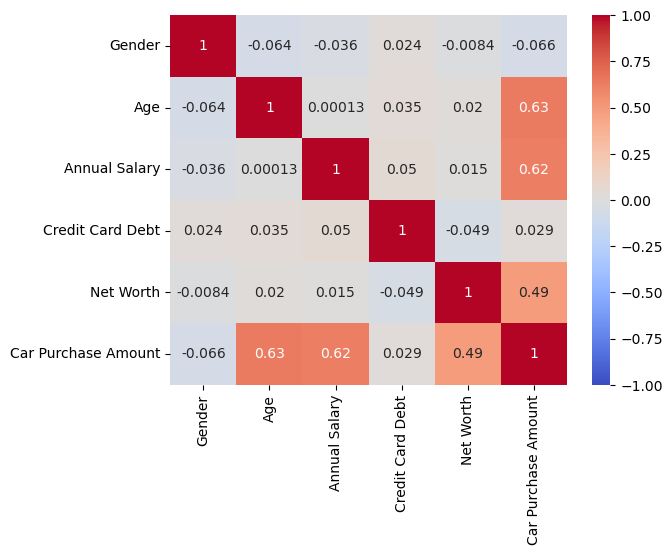

In [18]:
#상관관계보기
df_corr=df.corr(numeric_only=True)
import seaborn as sb
sb.heatmap(df_corr, annot=True, vmin=-1, vmax=1,cmap='coolwarm')
import matplotlib.pyplot as plt
plt.show()

나이, 자산은 자동차구매에 영향이 있구나.

In [20]:
#구매 금액 예측 인공지능 개발하기

#1. 데이터 전처리
df.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [29]:
#2.X,y 나누기
#이름, 이메일, 나라정보는 필요없다. 삭제
X=df.loc[ : , 'Gender': 'Net Worth']
y=df['Car Purchase Amount']

In [30]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [31]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [ ]:
#피쳐스케일링 regression은 알아서 해줌

In [ ]:
# 3. 훈련세트와 테스트세트 나누기

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=3)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [35]:
#LinearRegressio 모델
regressor1=LinearRegression()

In [36]:
regressor1.fit(X_train,y_train)

LinearRegression()

In [37]:
#테스트
from sklearn.metrics import r2_score, mean_squared_error

In [42]:
y_pred1=regressor1.predict(X_test)

In [66]:
mean_squared_error(y_test,y_pred1)

2.4595414598483347

In [67]:
r2_score(y_test,y_pred1)

0.9999999783205994

In [48]:
#데이터프레임으로 만들어 컬럼 붙이기
df_y=y_test.to_frame()

In [49]:
df_y

,Car Purchase Amount
130,51551.67997
291,53848.75550
37,10092.22509
239,44434.98419
191,42774.35579
...,...
367,46710.52519
302,44463.30502
175,49050.85378
348,49348.88394


In [50]:
df_y['y_pred1']=y_pred1

In [53]:
df_y.reset_index(drop=True, inplace=True)

<Axes: >

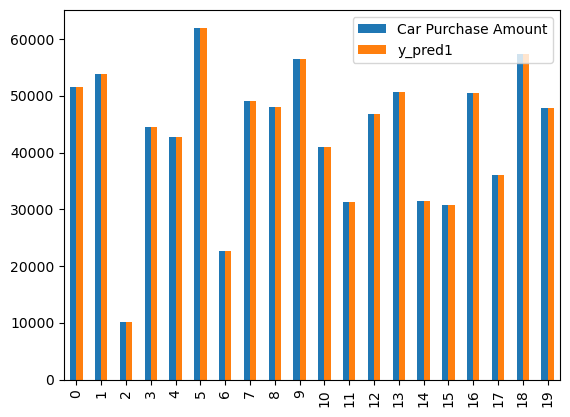

In [57]:
#차트로 그려보기 20개만
df_y.loc[0:19 , : ].plot(kind='bar')

In [62]:
#RandomForestRegressor 모델
regressor2=RandomForestRegressor(random_state=3)

In [63]:
regressor2.fit(X_train,y_train)

RandomForestRegressor(random_state=3)

In [64]:
y_pred2=regressor2.predict(X_test)

In [69]:
#테스트
mean_squared_error(y_test,y_pred2)

6273947.0055673905

In [68]:
r2_score(y_test,y_pred2)

0.9446988745919638

In [ ]:
#신규 고객에게 얼마나 팔 수 있을지 예측
#여, 40세, 연봉 50000, 신용카드 한도 10000, 순자산 60000

In [72]:
X.head(1)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.85172,62812.09301,11609.38091,238961.2505


In [76]:
new_data=np.array([0,40,50000,10000,60000])

In [79]:
new_data=new_data.reshape(1,5)

In [81]:
#모델 저장하기
import joblib

In [83]:
joblib.dump(regressor1, 'mod/regressor.pkl')

['model/regressor.pkl']